## Diabetes Prediction
#### In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/datasets/mathchi/diabetes-data-set) and will be using Machine Learning model (SVM) to make predictions on whether a person is suffering from diabetes or not


##### Let's first import all the necessary libraries. I'll use numpy and pandas to start with. For visualization, I will use pyplot subpackage of matplotlib and seaborn.For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

##### For processing the data, I'll import a few libraries. To split the available dataset for testing and training, I'll use the train_test_split method. To scale the features, I am using StandardScaler.

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##### Import dataset

In [42]:
df=pd.read_csv('diabetes.csv')

In [43]:
# Display first few rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [44]:
df.isnull().sum()  # Identifying missing values in each column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [45]:
df.describe()  # Checking mean, median, std deviation, etc.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
df.info()  # Understanding categorical and numerical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [47]:
df['Outcome'].value_counts()         #target column value count

Outcome
0    500
1    268
Name: count, dtype: int64

In [48]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Age
Non-Null Count  Dtype
--------------  -----
768 non-null    int64
dtypes: int64(1)
memory usage: 6.1 KB


In [49]:
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

In [50]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


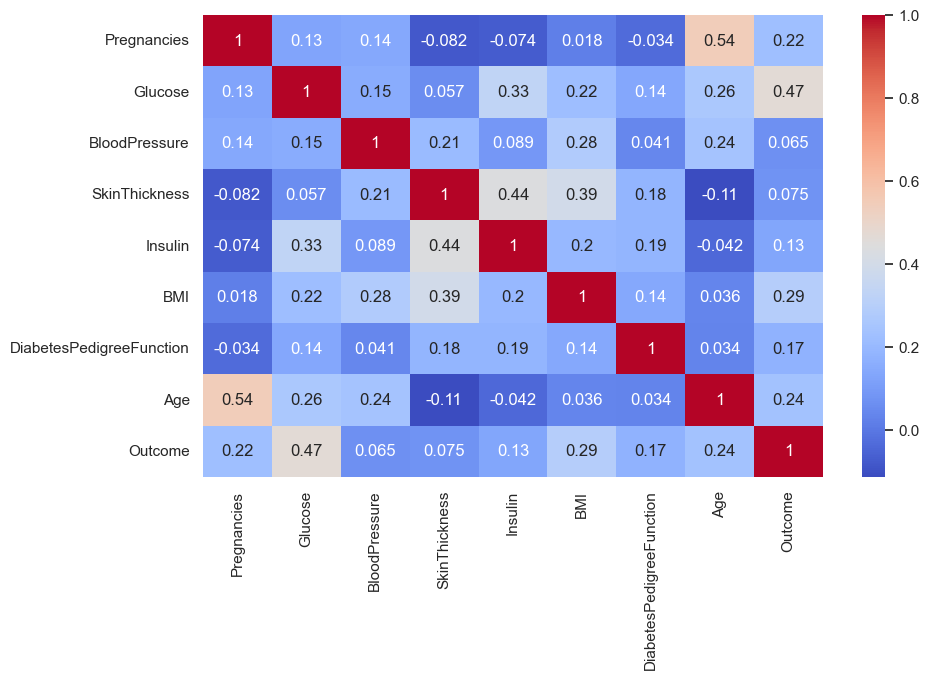

In [51]:
# Visualizing correlations between numerical features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')  # Heatmap for correlation analysis
plt.show()

#### Plot Target (Outcome) vs Input Features

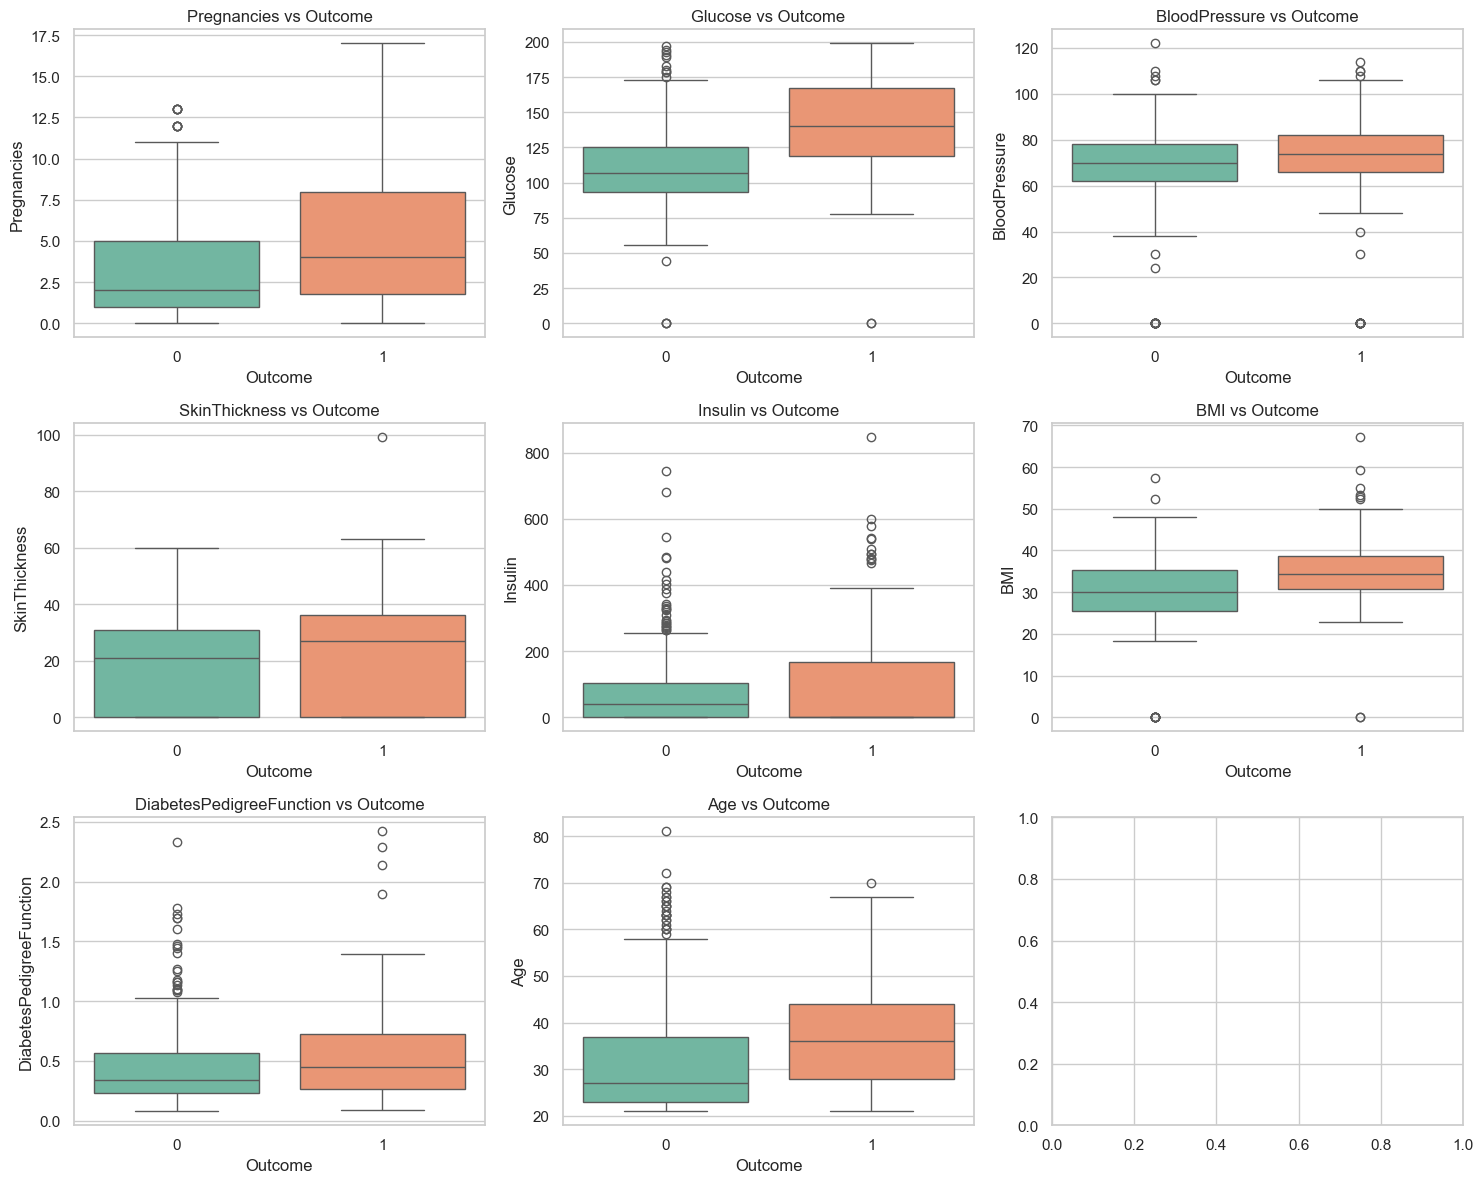

In [52]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots for all input features against Outcome
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # Adjust grid size if needed
axes = axes.flatten()

# Plot each feature against Outcome
for i, col in enumerate(df.columns[:-1]):  # Exclude 'Outcome' itself
    sns.boxplot(x="Outcome", y=col, data=df, ax=axes[i], hue="Outcome", palette="Set2", legend=False)
    axes[i].set_title(f"{col} vs Outcome")

# Adjust layout
plt.tight_layout()
plt.show()

#### Pair Plot for Feature Interaction

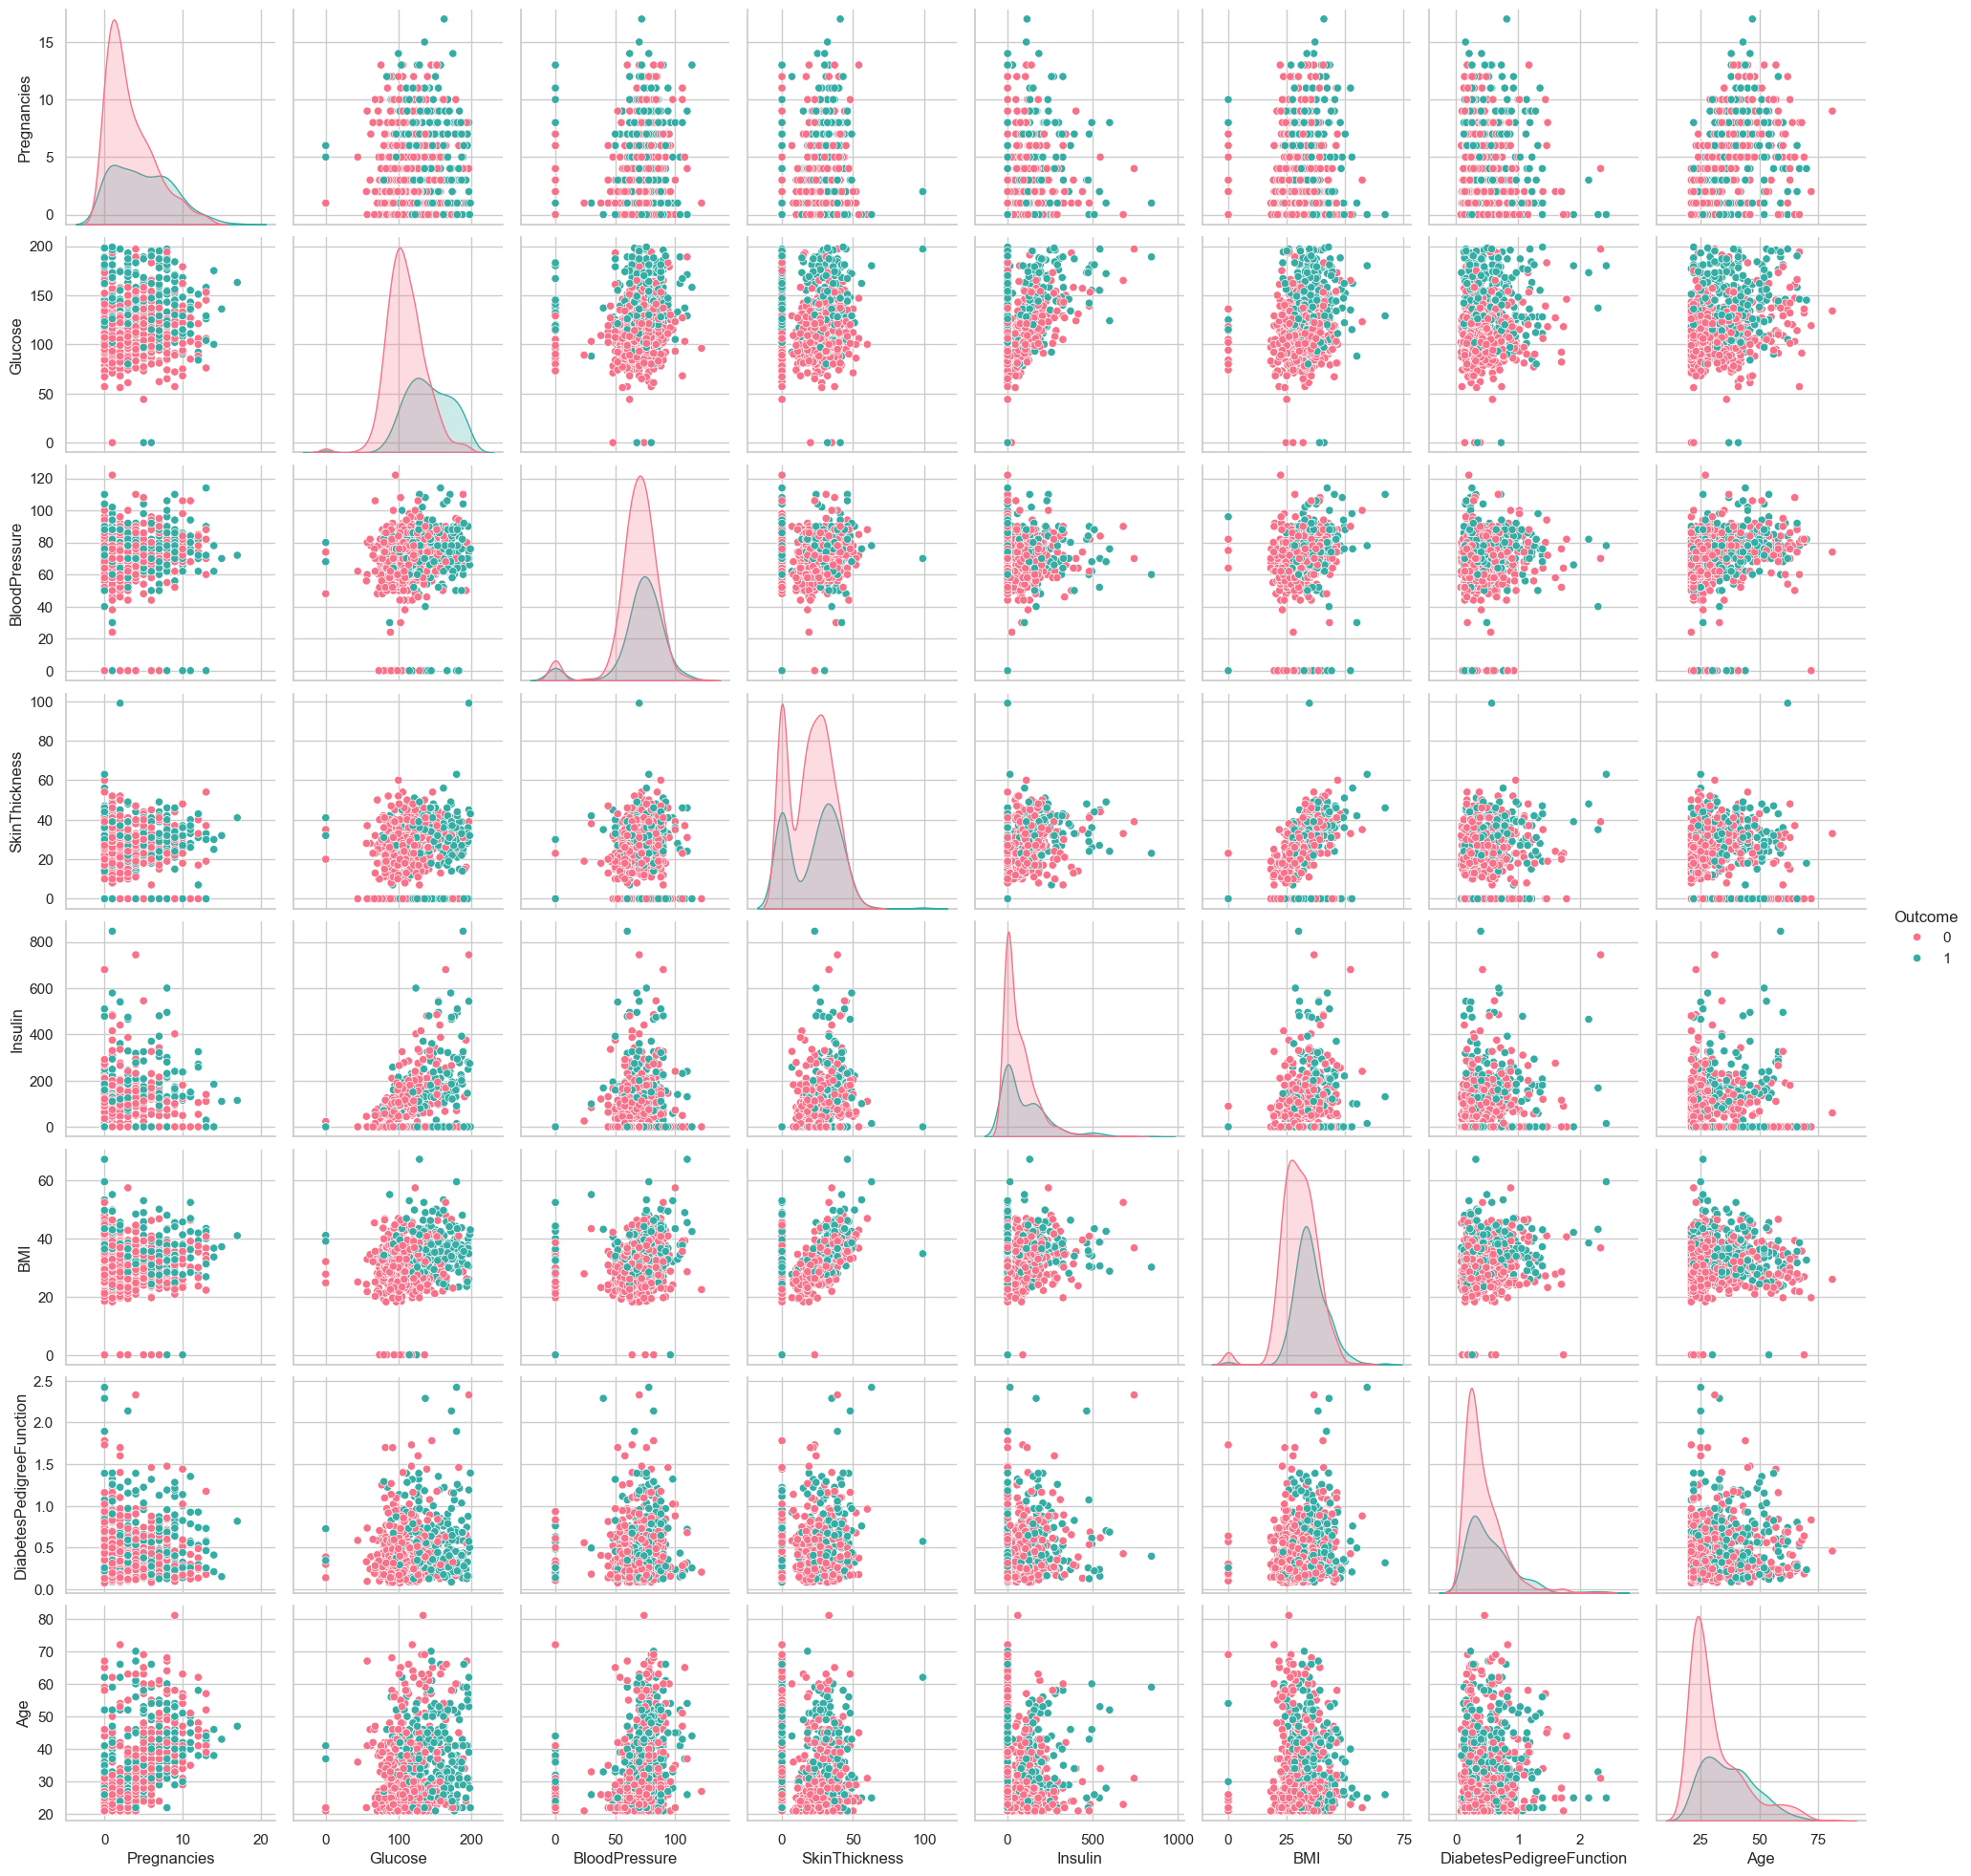

In [53]:
sns.pairplot(df, hue="Outcome", palette="husl")
plt.show()


#### Separate Target and Input Features

In [54]:
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

In [55]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [56]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#### Standardization

In [57]:
scaler=StandardScaler()

In [58]:
scaler.fit(X)

StandardScaler()

In [59]:
standard_data=scaler.transform(X)

In [60]:
print(standard_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [61]:
X=standard_data

In [62]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


#### Train and Test

In [63]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [64]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


### Model Training --> svm 

In [72]:
 #Import svm from sklearn

In [73]:
from sklearn import svm
classifier=svm.SVC(kernel='linear')

In [74]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

### Model Evaluation¶

In [75]:
#accuracy on training data
X_train_prediction = classifier.predict(X_train)
train_accuracy = accuracy_score(X_train_prediction,Y_train)
print(train_accuracy)

0.7866449511400652


In [76]:
#accuracy on testing data
X_test_prediction = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_prediction,Y_test)
print(test_accuracy)

0.7727272727272727


### Making a Predictive System

In [77]:
input=	(1,85,66,29,0,26.6,0.351,31)
input_as_array=np.asarray(input)

# reshape the np array as we are predicting for one instance
reshaped = input_as_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(reshaped)
print(std_data)


[[-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]]


C:\Users\Zainab Khan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:

prediction = classifier.predict(std_data)
print(prediction)
if(prediction==1):
    print('the person is diabetic')
else:
    print('the person is non diabetic')

[0]
the person is non diabetic
